# Compute LCC (Local Clustering Coefficient)

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([
    ('A', 'K'),
    ('A', 'B'),
    ('A', 'C'),
    ('B', 'C'),
    ('B', 'K'),
    ('C', 'E'),
    ('C', 'F'),
    ('D', 'E'),
    ('E', 'F'),
    ('E', 'H'),
    ('F', 'G'),
    ('I', 'J'),
])
print('Node LCC_F: {0:.4f}'.format(nx.clustering(G, 'F')))
print('Node LCC_A: {0:.4f}'.format(nx.clustering(G, 'A')))
print('Node LCC_J: {0:.4f}'.format(nx.clustering(G, 'J')))

Node LCC_F: 0.3333
Node LCC_A: 0.6667
Node LCC_J: 0.0000


In [2]:
nx.average_clustering(G)

0.28787878787878785

## Transitivity

* A triangle is a 3 node interconnection.
* Open triad is an open triangle (missing one side)
* A triangle is also known as a closed triad
* Closed triads contain 3 open triads

$$ Transitivity = \frac{3 \times no.\thinspace of \thinspace closed \thinspace triads}{no.\thinspace of \thinspace open \thinspace triads}$$

In [3]:
nx.transitivity(G)

0.4090909090909091

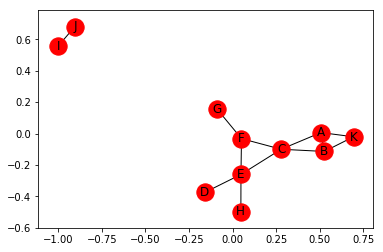

In [4]:
nx.draw_networkx(G)

#  Transitivity vs. Average Clustering Coefficient

* Both measure the tendency for edges to form triangles
* Transitivity weights nodes with large degree higher

Ave. clustering coeff.:	0.930070
Transitivity:		0.230769

-Most nodes have high LLC
-The high degree node has low LCC


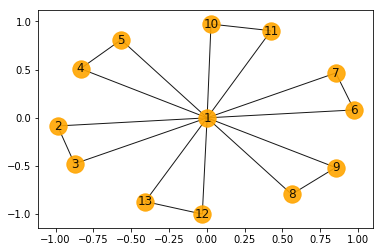

In [5]:
G1 = nx.Graph()
G1.add_edges_from([
    (1, 2),
    (1, 3),
    (1, 4),
    (1, 5),
    (1, 6),
    (1, 7),
    (1, 8),
    (1, 9),
    (1, 10),
    (1, 11),
    (1, 12),
    (1, 13),
    (2, 3),
    (4, 5),
    (6, 7),
    (8, 9),
    (10, 11),
    (12, 13),
])
print('Ave. clustering coeff.:\t{0:.6f}\nTransitivity:\t\t{1:.6f}'.format(
        nx.average_clustering(G1), nx.transitivity(G1)))
print("\n-Most nodes have high LLC\n-The high degree node has low LCC")
nx.draw_networkx(G1, node_color='orange', alpha=0.9)

Ave. clustering coeff.:	0.000000
Transitivity:		0.000000

-Most nodes have low LLC
-The high degree nodes has high LCC


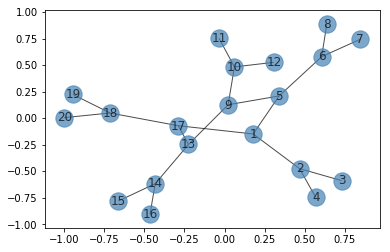

In [6]:
G2 = nx.Graph()
G2.add_edges_from([
    (1, 2), (2, 3), (2, 4),
    (1, 5),
    (5, 6), (6, 7), (6, 8),
    (5, 9),
    (9, 10), (10, 11), (10, 12),
    (9, 13),
    (13, 14), (14, 15), (14, 16),
    (13, 17),
    (17, 18), (18, 19), (18, 20),
    (1, 17),
])
print('Ave. clustering coeff.:\t{0:.6f}\nTransitivity:\t\t{1:.6f}'.format(
        nx.average_clustering(G2), nx.transitivity(G2)))
print("\n-Most nodes have low LLC\n-The high degree nodes has high LCC")
nx.draw_networkx(G2, node_color='steelblue', alpha=0.7)


# Distance measures

### Paths

In [7]:
nx.shortest_path(G2, 14, 6)

[14, 13, 9, 5, 6]

In [8]:
nx.shortest_path_length(G2, 14, 6)

4

In [9]:
T = nx.bfs_tree(G2, 14)
T.edges()

OutEdgeView([(14, 13), (14, 15), (14, 16), (13, 9), (13, 17), (9, 5), (9, 10), (17, 18), (17, 1), (5, 6), (10, 11), (10, 12), (18, 19), (18, 20), (1, 2), (6, 7), (6, 8), (2, 3), (2, 4)])

In [10]:
nx.shortest_path_length(G2, 14)

{14: 0,
 13: 1,
 15: 1,
 16: 1,
 9: 2,
 17: 2,
 5: 3,
 10: 3,
 18: 3,
 1: 3,
 6: 4,
 11: 4,
 12: 4,
 19: 4,
 20: 4,
 2: 4,
 7: 5,
 8: 5,
 3: 5,
 4: 5}

#### Average distance between every pair of nodes

In [11]:
nx.average_shortest_path_length(G2)

3.6052631578947367

#### Diameter: maximum distance between any pair of nodes

In [12]:
nx.diameter(G2)

6

#### Eccentricity

largest distance of node n and all other nodes

In [13]:
nx.eccentricity(G2)

{1: 4,
 2: 5,
 3: 6,
 4: 6,
 5: 4,
 6: 5,
 7: 6,
 8: 6,
 9: 4,
 10: 5,
 11: 6,
 12: 6,
 13: 4,
 14: 5,
 15: 6,
 16: 6,
 17: 4,
 18: 5,
 19: 6,
 20: 6}

#### Radius

...is the minimum eccentricity

In [14]:
nx.radius(G2)

4

#### Periphery

...of a graph is the set of nodes that have eccentricity equal to the diameter

In [15]:
nx.periphery(G2)

[3, 4, 7, 8, 11, 12, 15, 16, 19, 20]

#### Center

... is the set of nodes that have eccentricity equal to the radius.

In [16]:
nx.center(G2)

[1, 5, 9, 13, 17]

# Karate club example

In [20]:
G3 = nx.karate_club_graph()
G3 = nx.convert_node_labels_to_integers(G, first_label=1)

In [24]:
for fn in [nx.average_shortest_path_length, nx.radius, nx.diameter, nx.center]:
    print(fn.__name__)
    print(fn.__name__, fn(G3))
nx.draw_networkx(G3, node_color='steelblue', alpha=0.7)

average_shortest_path_length


NetworkXError: Graph is not connected.

# Connectivity

An undirected graph is **connected** if, for every pair of nodes, there is a path between them.

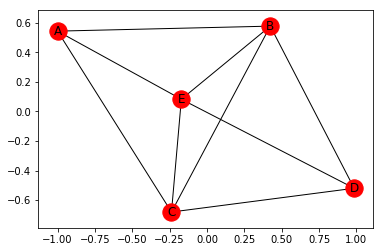

In [25]:
# Setup graph like lecture
G4 = nx.Graph()
G4.add_edges_from([
    ('A', 'B'),
    ('A', 'E'),
    ('E', 'D'),
    ('D', 'C'),
    ('C', 'B'),
    ('A', 'C'),
    ('D', 'B'),
    ('C', 'E'),
    ('B', 'E'),
    ('A', 'B'),
    ('A', 'E'),
    ('E', 'D'),
    ('D', 'C'),
    ('C', 'B'),
    ('A', 'C'),
    ('D', 'B'),
    ('C', 'E'),
    ('B', 'E'),
])
nx.draw_networkx(G4)

In [26]:
nx.is_connected(G)

False

However, if we remove edges, the graph becomes disconnected

### Connected components

A subest of nodes such that:

1. Every node in the subset has a path to every other node

2. No other node has a path to any node in the subset

![Connected components example](./connected_components.png)

In [30]:
print(nx.number_connected_components(G4))
print(nx.number_connected_components(G3))
print(nx.node_connected_component(G2, 12))

1
2
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}


# Connected components in directed graphs

A directed graph is strongly connected if, for every pair of nodes $u$ and $v$, there is a directed graph from $u$ to $v$ and a directed path from $v$ to $u$.
![Strongly connected](./strongly_connected.png)

![Weakly connected](./weakly_connected.png)
![Strongly connected component](./strongly_connected_component.png)

average_shortest_path_length 1.8095238095238095
radius 2
diameter 4
center ['D', 'E']


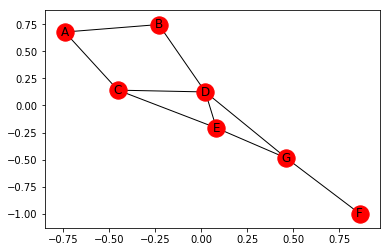

In [23]:
G = nx.Graph()
G.add_edges_from([
    ('A', 'B'),
    ('A', 'C'),
    ('B', 'D'),
    ('C', 'D'),
    ('C', 'E'),
    ('D', 'E'),
    ('D', 'G'),
    ('E', 'G'),
    ('G', 'F'),
])
nx.draw_networkx(G)
for fn in [nx.average_shortest_path_length, nx.radius, nx.diameter, nx.center]:
    print(fn.__name__, fn(G))

In [25]:
nx.e(G)

['A', 'F']

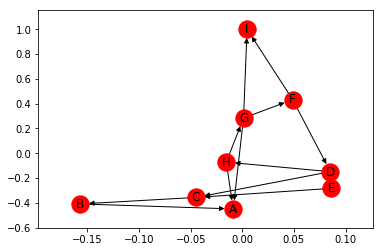

In [13]:
G = nx.DiGraph()
G.add_edges_from([
    ('B', 'A'),
    ('H', 'A'),
    ('G', 'A'),
    ('G', 'I'),
    ('H', 'G'),
    ('D', 'H'),
    ('C', 'B'),
    ('D', 'C'),
    ('E', 'C'),
    ('F', 'D'),
    ('G', 'F'),
    ('F', 'I'),
])
nx.draw_networkx(G)


In [27]:
print(2/12)

0.16666666666666666


In [20]:
in_degrees = G.in_degree()
in_degree_values = sorted(set(in_degrees.values()))
histogram = [in_degrees.values().count(i)/float(nx.number_of_nodes(G)) for i in in_degree_values]
plt.bar(in_degree_values, histogram)
plt.xlabel('In Degree')
plt.ylabel('Fraction of Nodes')

AttributeError: 'InDegreeView' object has no attribute 'values'

## Preferential attachment modle

for any node U, the probability of a new node node U is

$$ \frac{k_U}{\Sigma_j k_j}$$

where $k_U$ is the degree of node U, and $\Sigma_j k_j$ is the sum of the degrees of all nodes in the network.

#### Barabasi Albert graph:

In [28]:
G = nx.barabasi_albert_graph(1000000, 1)
degrees = G.degree()
degree_values = sorted(set(degrees.values()))
histogram = [list(degrees.values().count(i))/float(nx.number_of_nodes(G)) for i in degree_values]
plt.figure()
plt.plot(degree_values, histogram, 'o')
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.xscale('log')
plt.yscale('log')
plt.show()

AttributeError: 'DegreeView' object has no attribute 'values'

### W4 test

1. 1/3X, 1/2
2. 3

#### 3
[C] Networks with a power law distribution have many nodes with large degree and a few nodes with very small degree.


[NC] If we draw a power law distribution in log-log scale, the distribution will look like a straight line.


[NC] In the Preferential Attachment Model, a new node always connects to the node with highest in-degree.


[C] The Preferential Attachment Model generates a network with a power law degree distribution.

#### 4
[NC] The Preferential Attachment Model generates a small-world network.


[NC] The degree distribution of small-world networks follows power-law distribution.


[NC] Small-world networks are always connected.


[C] In the small-world model starting with k nearest neighbors, increasing the rewiring probability p generally decreases both the average clustering coefficient and average shortest path.


[C] Some Small-world networks have high local clustering coefficient and small average shortest path.

5. Average local clustering coefficient will increase and average shortest path will decrease.
6. A

In [37]:
#7 
G = nx.Graph()
G.add_edges_from([
    ('C', 'G'),
    ('C', 'A'),
    ('G', 'D'),
    ('A', 'D'),
    ('D', 'E'),
    ('A', 'E'),
    ('D', 'B'),
    ('H', 'D'),
    ('E', 'H'),
    ('F', 'H'),
])
for i in nx.jaccard_coefficient(G):
    if i[0] == 'C' and i[1] == 'D':
        print(i)

('C', 'D', 0.4)


In [40]:
# 8
for i in nx.resource_allocation_index(G):
    if i[0] == 'C' and i[1] == 'D':
        print(i)

('C', 'D', 0.8333333333333333)


In [39]:
# 9
for i in nx.preferential_attachment(G):
    if i[0] == 'C' and i[1] == 'D':
        print(i)

('C', 'D', 10)


### 10
[NC] The Common Neighbor Soundarajan-Hopcroft score of node C and node D is 2.


[C] The Common Neighbor Soundarajan-Hopcroft score of node A and node G is 4.


[NC] The Resource Allocation Soundarajan-Hopcroft score of node E and node F is 0.


[C] The Resource Allocation Soundarajan-Hopcroft score of node A and node G is 0.7

In [60]:
Gn = nx.Graph()
Gn.add_edges_from([
    ('C', 'G'),
    ('C', 'A'),
    ('G', 'D'),
    ('A', 'D'),
    ('D', 'E'),
    ('A', 'E'),
    ('D', 'B'),
    ('H', 'D'),
    ('E', 'H'),
    ('F', 'H'),
])
for n in ['A', 'B', 'C', 'D', 'G']:
    Gn.node[n]['community'] = 0
for n in ['E', 'F', 'H']:
    Gn.node[n]['community'] = 1
preds = nx.cn_soundarajan_hopcroft(Gn)
print('Common neighbor\n')
for u, v, p in preds:
    print('({}, {}) -> {}'.format(u, v, p))
# for i in nx.cn_soundarajan_hopcroft(Gn):
#     print(i)
print('Resource Allocation Indexes\n')
preds = nx.ra_index_soundarajan_hopcroft(Gn)
for u, v, p in preds:
    print('({}, {}) -> {}'.format(u, v, p))

Common neighbor

(A, B) -> 2
(A, G) -> 4
(A, F) -> 0
(A, H) -> 2
(C, F) -> 0
(C, E) -> 1
(C, B) -> 0
(C, D) -> 4
(C, H) -> 0
(F, B) -> 0
(F, G) -> 0
(F, E) -> 2
(F, D) -> 1
(E, B) -> 1
(E, G) -> 1
(G, B) -> 2
(G, H) -> 1
(B, H) -> 1
Resource Allocation Indexes

(A, B) -> 0.2
(A, G) -> 0.7
(A, F) -> 0
(A, H) -> 0
(C, F) -> 0
(C, E) -> 0
(C, B) -> 0
(C, D) -> 0.8333333333333333
(C, H) -> 0
(F, B) -> 0
(F, G) -> 0
(F, E) -> 0.3333333333333333
(F, D) -> 0
(E, B) -> 0
(E, G) -> 0
(G, B) -> 0.2
(G, H) -> 0
(B, H) -> 0
